# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
pip install citipy


Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["sys"]["country"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aitape
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 4 of Set 1 | mahibadhoo
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | ingham
Processing Record 8 of Set 1 | pevek
Processing Record 9 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 10 of Set 1 | salalah
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | itarema
Processing Record 15 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 16 of Set 1 | los llanos de aridane
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | nayoro
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | vila franca do campo
Pr

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aitape,-3.1374,142.3475,78.71,88,100,8.97,PG,PG
1,ushuaia,-54.8000,-68.3000,60.46,41,75,14.97,AR,AR
2,mahibadhoo,3.7833,72.9667,80.51,76,12,6.80,MV,MV
3,san patricio,28.0170,-97.5169,63.86,89,100,4.56,US,US
4,khatanga,71.9667,102.5000,16.50,96,100,7.02,RU,RU


In [37]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data (adding index col called City_ID)
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aitape,-3.1374,142.3475,78.71,88,100,8.97,PG,PG
1,ushuaia,-54.8000,-68.3000,60.46,41,75,14.97,AR,AR
2,mahibadhoo,3.7833,72.9667,80.51,76,12,6.80,MV,MV
3,san patricio,28.0170,-97.5169,63.86,89,100,4.56,US,US
4,khatanga,71.9667,102.5000,16.50,96,100,7.02,RU,RU


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

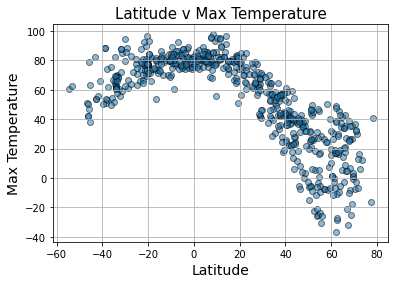

In [62]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lat, max_temp, edgecolor="black", linewidth=1, marker="o", alpha=0.5, label="Cities")

# Incorporate the other graph properties
plt.title(f"Latitude vs Max Temperature",fontsize =15)
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Max Temperature',fontsize =14)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

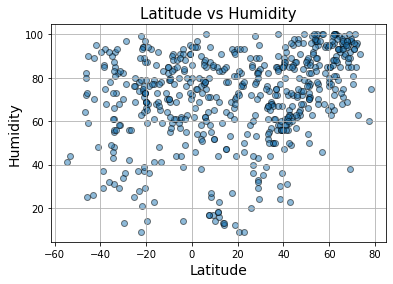

In [64]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat, humidity, edgecolor="black", linewidth=1, marker="o", alpha=0.5, label="Cities")

# Incorporate the other graph properties
plt.title(f"Latitude vs Humidity",fontsize =15)
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Humidity',fontsize =14)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

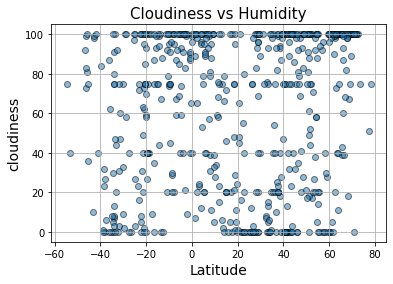

In [65]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat, cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.5, label="Cities")

# Incorporate the other graph properties
plt.title(f"Latitude vs Humidity",fontsize =15)
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('cloudiness',fontsize =14)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

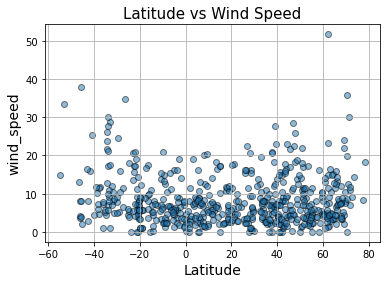

In [68]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat, wind_speed, edgecolor="black", linewidth=1, marker="o", alpha=0.5, label="Cities")

# Incorporate the other graph properties
plt.title(f"Latitude vs Wind Speed",fontsize =15)
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('wind_speed',fontsize =14)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[cities["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mahibadhoo,3.7833,72.9667,80.51,76,12,6.80,MV,MV
3,san patricio,28.0170,-97.5169,63.86,89,100,4.56,US,US
4,khatanga,71.9667,102.5000,16.50,96,100,7.02,RU,RU
5,ingham,42.6000,-84.3833,39.38,59,100,8.05,US,US
6,pevek,69.7008,170.3133,-0.99,97,100,8.19,RU,RU


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[cities["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aitape,-3.1374,142.3475,78.71,88,100,8.97,PG,PG
1,ushuaia,-54.8000,-68.3000,60.46,41,75,14.97,AR,AR
8,bluff,-46.6000,168.3333,50.81,64,92,13.04,NZ,NZ
9,new norfolk,-42.7826,147.0587,53.71,70,98,2.95,AU,AU
10,itarema,-2.9248,-39.9167,87.75,49,21,19.17,BR,BR


###  Temperature vs. Latitude Linear Regression Plot

In [19]:
# Linear regression on Northern Hemisphere
# fig1, ax1 = plt.subplots(figsize=(10, 5))


x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)



slope:-1.2806048406858284
intercept:92.41209422112371
rvalue (Correlation coefficient):-0.8434526099137236
stderr:0.041407355454143376
y = -1.28x + 92.41


The r-squared is: 0.09909108068194131


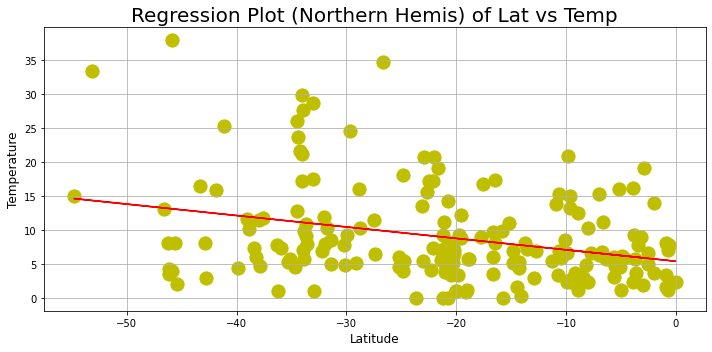

In [50]:

# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values,y_values,s=175, color="y")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot (Northern Hemis) of Lat vs Temp',fontsize =20)
plt.xlabel('Latitude',fontsize =12)
plt.ylabel('Temperature',fontsize =12)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.grid()
plt.show()


In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.5050264273373479
intercept:84.62357044768167
rvalue (Correlation coefficient):0.5948447022631034
stderr:0.05058768128654411
y = 0.51x + 84.62


The r-squared is: 0.09909108068194131


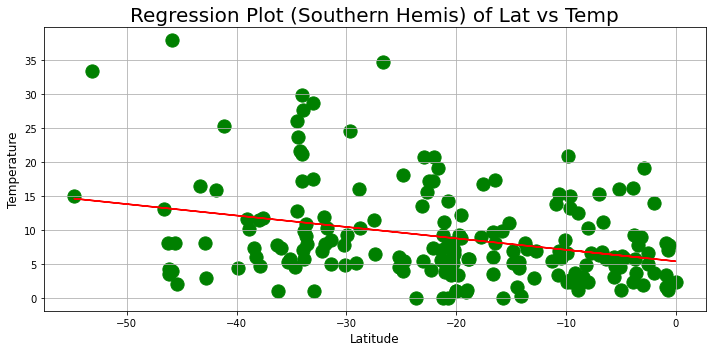

In [51]:
fig2, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values,y_values,s=175, color="g")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot (Southern Hemis) of Lat vs Temp',fontsize =20)
plt.xlabel('Latitude',fontsize =12)
plt.ylabel('Temperature',fontsize =12)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.grid()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The regresion plot shows that temperature has a positive correlation with latitude. As the city keeps getting closer to equator (0), the temperature is warmer.

### Humidity vs. Latitude Linear Regression Plot

slope:0.4211565242746414
intercept:56.70130340589567
rvalue (Correlation coefficient):0.41769995698734613
stderr:0.046508123144601975
The r-squared is: 0.1744732540672308


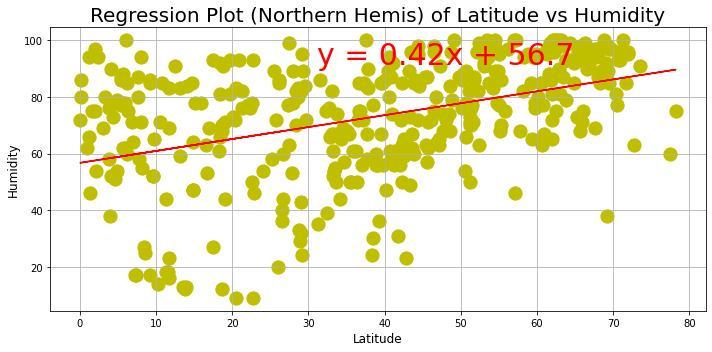

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


fig3, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values,y_values,s=175, color="y")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot (Northern Hemis) of Latitude vs Humidity',fontsize =20)
plt.xlabel('Latitude',fontsize =12)
plt.ylabel('Humidity',fontsize =12)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.grid()
plt.show()

slope:0.24035653405041182
intercept:72.9253907323851
rvalue (Correlation coefficient):0.1541246703668686
stderr:0.11421617704974883
The r-squared is: 0.023754414015695908


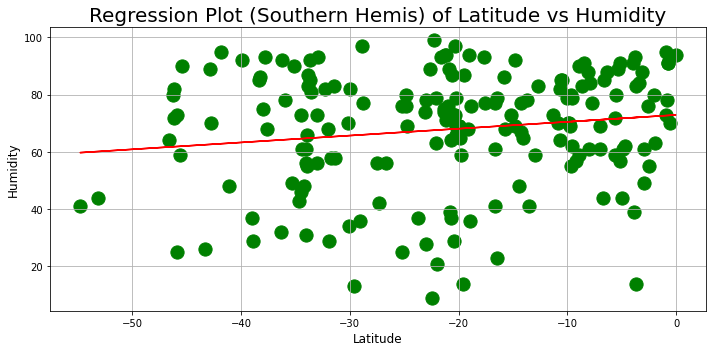

In [53]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


fig4, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values,y_values,s=175, color="g")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot (Southern Hemis) of Latitude vs Humidity',fontsize =20)
plt.xlabel('Latitude',fontsize =12)
plt.ylabel('Humidity',fontsize =12)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.grid()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The regression line is flat and there is no correlation between humidity and latiude. 

### Cloudiness vs. Latitude Linear Regression Plot

slope:0.32606535327348685
intercept:48.46452877237152
rvalue (Correlation coefficient):0.171199414047367
stderr:0.09526359478715407
The r-squared is: 0.029309239370161798


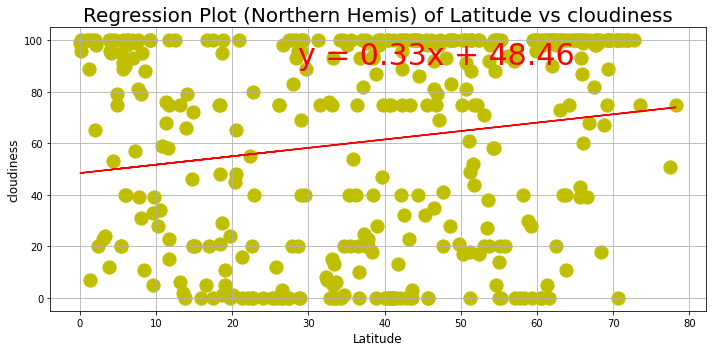

In [54]:
#Northern Cloudiness

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



fig5, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values,y_values,s=175, color="y")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot (Northern Hemis) of Latitude vs cloudiness',fontsize =20)
plt.xlabel('Latitude',fontsize =12)
plt.ylabel('cloudiness',fontsize =12)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.grid()
plt.show()

slope:0.7726483591946293
intercept:77.06880343713526
rvalue (Correlation coefficient):0.28013595575963735
stderr:0.19625947242772906
The r-squared is: 0.07847615370936549


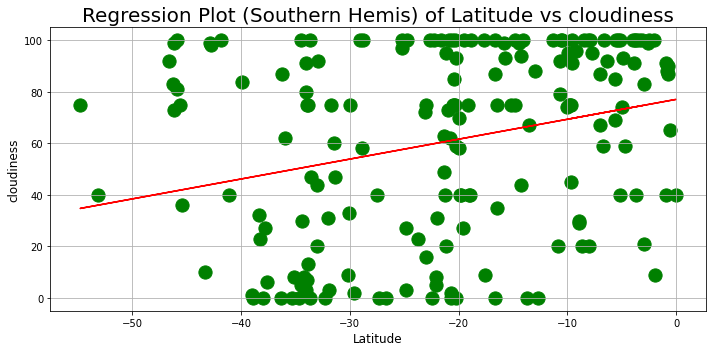

In [55]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


fig6, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values,y_values,s=175, color="g")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot (Southern Hemis) of Latitude vs cloudiness',fontsize =20)
plt.xlabel('Latitude',fontsize =12)
plt.ylabel('cloudiness',fontsize =12)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.grid()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is very slight positive correlation between latitude and cloudiness. The closer the city is to Equator, the cloudiness increases slightly.

### Wind Speed vs. Latitude Linear Regression Plot

slope:0.04452775502624017
intercept:6.212208197204967
rvalue (Correlation coefficient):0.1451943278873109
stderr:0.015404179759453532
y = 0.04x + 6.21
The r-squared is: 0.02108139285064795


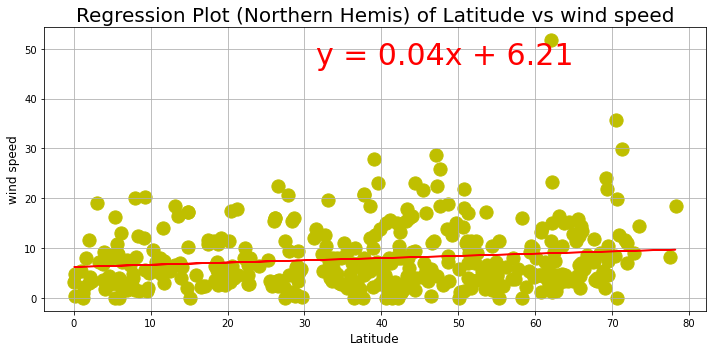

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)


fig7, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values,y_values,s=175, color="y")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot (Northern Hemis) of Latitude vs wind speed',fontsize =20)
plt.xlabel('Latitude',fontsize =12)
plt.ylabel('wind speed',fontsize =12)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.grid()
plt.show()

slope:-0.16853887754849411
intercept:5.405264966246797
rvalue (Correlation coefficient):-0.31478735788138207
stderr:0.03766930123627153
The r-squared is: 0.09909108068194131


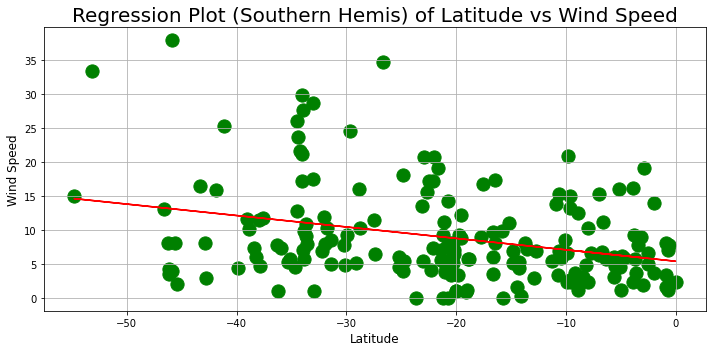

In [49]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


fig8, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values,y_values,s=175, color="g")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot (Southern Hemis) of Latitude vs Wind Speed',fontsize =20)
plt.xlabel('Latitude',fontsize =12)
plt.ylabel('Wind Speed',fontsize =12)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.grid()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is slight inverse correlation between wind speed and latitude. The wind speed is more near the ends such as Artic and end of southern hemisphere - Antartica 